# Examples

This notebooks contains some examples on running a full analysis and performing data exploration on the features

In [1]:
%%capture
# Start by using the latest version of olefin (branch v2 for now)
!pip install --user --upgrade git+https://gitlab.cern.ch/grigolet/olefin@v2#egg=olefin

# Example 1: exploring SummaryRuns

This example shows how to explore the SummaryRuns file and use it to run an analysis

In [2]:
%matplotlib inline
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import olefin
plt.style.use('https://gist.githubusercontent.com/themutt/34b9121f44a4a525734c9c7c8577233d/raw/946d7a234cd4bc41792d2c3248300e89074fbe75/rootlike.mplstyle')
olefin.__version__

'2.0.0'

Let's check the summary runs excel file

In [3]:
dfruns = pd.read_excel('/eos/project/g/ghg-studies/BackupRPC/SummaryRuns.xlsx')
dfruns.tail()

elog ID      date  \
119  https://elogepdt-rdgas.web.cern.ch/RPC/362  20210226   
120  https://elogepdt-rdgas.web.cern.ch/RPC/365  20210227   
121  https://elogepdt-rdgas.web.cern.ch/RPC/365  20210227   
122  https://elogepdt-rdgas.web.cern.ch/RPC/366  20210228   
123  https://elogepdt-rdgas.web.cern.ch/RPC/366  20210228   

                              gas mixture gas mixture label     GWP  \
119  R134a/CO2/iC4H10/SF6 75.2/20/4.5/0.3            CO2_20  1147.0   
120  R134a/CO2/iC4H10/SF6 65.2/30/4.5/0.3            CO2_30  1005.0   
121  R134a/CO2/iC4H10/SF6 65.2/30/4.5/0.3            CO2_30  1005.0   
122  R134a/CO2/iC4H10/SF6 55.2/40/4.5/0.3            CO2_40   862.0   
123  R134a/CO2/iC4H10/SF6 55.2/40/4.5/0.3            CO2_40   862.0   

     samples per HV  RPC  working point [V]  efficiency [%]  \
119          1000.0  5.0            9204.94        0.936857   
120          3000.0  4.0            8925.00        0.903000   
121          3000.0  5.0            9046.00        0.935000   
122          3000.0  4.0            8765.00        0.909200   
123          3000.0  5.0            8765.00        0.919900   

     streamer probability [%]  avalanche charge [pC]  streamer charge [pC]  \
119                  0.031858                0.94192              15.56637   
120                  0.092900                0.95000              14.20000   
121                  0.076500                1.22000              29.86000   
122                  0.052440                1.15000              18.34000   
123                  0.049200                1.82000              24.07000   

     time resolution [ns]  cluster size [/2cm]  current [uA]  pressure [mbar]  \
119              3.740589             4.134279      0.073464            978.0   
120              3.760000             2.060000      0.058000            978.3   
121             30.300000             3.500000      0.083000            978.3   
122              6.290000             2.500000      0.050000            978.3   
123             27.800000             2.780000      0.067000            978.3   

     temperature [°C]                                              notes  
119              21.9  RPC5 strips noise on first run (4000 sample po...  
120              22.4                                                NaN  
121              22.4                                                NaN  
122              22.6                                                NaN  
123              22.6                                                NaN

In [4]:
# Lets create a function to convert the 'gas mixture' column
# to a dict of gases with their composition
def gas_mixture_to_dict(gas_mixture: str):
    # Split over a space to separate names from percents.
    try:
        names, percents = gas_mixture.split(' ')
        splitted_names = map(str.upper, names.split('/'))
        splitted_percents = map(float, percents.split('/'))
        return dict(zip(splitted_names, splitted_percents))
    except:
        return None
# Test the function with a single entry
gas_mixture_to_dict(dfruns.iloc[0]['gas mixture'])

{'R134A': 95.2, 'IC4H10': 4.5, 'N5110': 0.3}

In [5]:
# Let's select all the runs with a standard gas mixture
# And with 8000 events
std_mix =  {'R134A': 95.2, 'IC4H10': 4.5, 'SF6': 0.3}
dfruns[(dfruns['gas mixture'].apply(gas_mixture_to_dict) == std_mix) & (dfruns['samples per HV'] == 8000)]

elog ID      date  \
52  https://elogepdt-rdgas.web.cern.ch/RPC/251  20200129   
53  https://elogepdt-rdgas.web.cern.ch/RPC/251  20200129   
54  https://elogepdt-rdgas.web.cern.ch/RPC/251  20200129   
95  https://elogepdt-rdgas.web.cern.ch/RPC/300  20200817   
96  https://elogepdt-rdgas.web.cern.ch/RPC/300  20200817   
97  https://elogepdt-rdgas.web.cern.ch/RPC/300  20200817   
99  https://elogepdt-rdgas.web.cern.ch/RPC/314  20200902   

                      gas mixture gas mixture label     GWP  samples per HV  \
52  R134a/iC4H10/SF6 95.2/4.5/0.3               STD  1435.0          8000.0   
53  R134a/iC4H10/SF6 95.2/4.5/0.3               STD  1435.0          8000.0   
54  R134a/iC4H10/SF6 95.2/4.5/0.3               STD  1435.0          8000.0   
95  R134a/iC4H10/SF6 95.2/4.5/0.3               STD  1435.0          8000.0   
96  R134a/iC4H10/SF6 95.2/4.5/0.3               STD  1435.0          8000.0   
97  R134a/iC4H10/SF6 95.2/4.5/0.3               STD  1435.0          8000.0   
99  R134a/iC4H10/SF6 95.2/4.5/0.3               STD  1433.0          8000.0   

    RPC  working point [V]  efficiency [%]  streamer probability [%]  \
52  2.0          10040.230        0.949536                  0.103481   
53  4.0           9567.487        0.935427                  0.011910   
54  5.0           9708.500        0.943674                  0.012854   
95  2.0           9933.347        0.954736                  0.187695   
96  4.0           9526.370        0.914015                  0.012557   
97  5.0           9657.185        0.909750                  0.015474   
99  3.0           9916.866        0.947830                  0.059126   

    avalanche charge [pC]  streamer charge [pC]  time resolution [ns]  \
52               0.815969             17.435000              3.861671   
53               0.829397             10.071220              4.377203   
54               0.800838             15.161860              4.108465   
95               0.906817             22.293140              7.385588   
96               0.888992              9.659608              6.871570   
97               0.870119             14.203680              6.856629   
99               0.605754              9.542367              3.997723   

    cluster size [/2cm]  current [uA]  pressure [mbar]  temperature [°C] notes  
52             3.773071      0.120000            968.1              25.1   NaN  
53             2.847536      0.121748            968.1              25.1   NaN  
54             2.109212      0.262167            968.1              25.1   NaN  
95             3.827426      0.159189            967.8              22.1   NaN  
96             2.335722      0.251734            967.8              22.1   NaN  
97             3.371415      0.280000            967.8              22.1   NaN  
99             2.927019      1.218755            968.2              22.3   NaN

Lmet's choose the '20200129' run: there are RPC 2, 4, 5.
By looking at the elog entry and its analysis notebook we
can see the RPC4 and RPC5 runs are on `Cosmics0` and RPC2 is
on `Cosmics1`

In [6]:
run_folder = Path('/eos/project/g/ghg-studies/BackupRPC/256/20200129/no-header-512/Cosmics0/MIX0')
# Let's check if configs are okay
config = olefin.config.copy()
print(config.to_yaml())

acquisition:
  header: 520
  record_length: 520
  strip_map:
    wave1:
      rpc: 6
      strip: 1
    wave2:
      rpc: 6
      strip: 2
    wave3:
      rpc: 6
      strip: 3
    wave4:
      rpc: 6
      strip: 4
  trigger: wave0
digitizer:
  adc_to_mv: 0.1220703125
  bit_resolution: 14
  sample_frequency: 500
  time_resolution: 2.0
  vpp: 2
rpc:
  resistance: 56
run:
  currents_path: currents.xlsx
  efficiency_parameters_limits: !!python/tuple
  - !!python/tuple
    - 0
    - 0.0001
    - 6000
  - !!python/tuple
    - 1
    - 0.2
    - 12000
  fit_params:
  - 0.9
  - 0.01
  - 9800
  gas_mixture:
    co2: 60
    hfo: 35
    ic4h10: 4
    sf6: 1
  initial_params:
  - 0.9
  - 0.01
  - 9800
  mix_folder: MIX0
  p: 965
  p0: 965
  t: 20
  t0: 20
  working_point_delta: 200
signal:
  axis: 1
  baseline_interval:
  - 0
  - 200
  baseline_threshold: 5
  charge_factor: 0.004359654017857143
  charge_region:
  - 5
  - 30
  charge_thresh: 9
  charge_thresh_av: 5
  charge_threshold: 0.15
  heig

In this case we know that the run was made on v1730 and the default `strip_map` in the config must be changed:

In [7]:
config.acquisition.strip_map =  {
    'wave1': {
        'rpc': 4,
        'strip': 1
    },
    'wave2': {
        'rpc': 4,
        'strip': 2
    },
    'wave3': {
        'rpc': 4,
        'strip': 3
    },
    'wave4': {
        'rpc': 4,
        'strip': 4
    },
    'wave5': {
        'rpc': 4,
        'strip': 5
    },
    'wave6': {
        'rpc': 4,
        'strip': 6
    },
    'wave7': {
        'rpc': 4,
        'strip': 7
    },
    'wave8': {
        'rpc': 5,
        'strip': 1
    },
    'wave9': {
        'rpc': 5,
        'strip': 2
    },
    'wave10': {
        'rpc': 5,
        'strip': 3
    },
    'wave11': {
        'rpc': 5,
        'strip': 4
    },
    'wave12': {
        'rpc': 5,
        'strip': 5
    },
    'wave13': {
        'rpc': 5,
        'strip': 6
    },
    'wave14': {
        'rpc': 5,
        'strip': 7
    },
}
config.run.gas_mixture = std_mix

We can do now a run analysis

In [8]:
run_analysis = olefin.EPDTRunAnalysis.from_path(run_folder, config=config, keep_data=True)
run_analysis.run()

  0%|          | 0/7 [00:00<?, ?it/s]

In [9]:
run_analysis.data

effmax  effmax_err     gamma  gamma_err         hv50  hv50_err  \
rpc                                                                     
4    0.945017    0.001161  0.008530   0.000073  8927.523706  1.475137   
5    0.958408    0.001298  0.007013   0.000056  8995.376015  1.666093   

         chi2         knee  working_point  streamer_probability  ...  \
rpc                                                              ...   
4    0.000066  9272.691031    9472.691031              0.011564  ...   
5    0.000074  9415.214156    9615.214156                   NaN  ...   

     avalanche  avalanche_error   streamer  streamer_error  prompt_charge  \
rpc                                                                         
4     1.506245         1.495008  25.687553       29.636039       1.780269   
5     1.838645         2.068944  38.672051       48.141265       2.287945   

     prompt_charge_error      fwhm  fwhm_error  cluster_size  \
rpc                                                            
4               4.167416  9.005107    0.096628      1.630133   
5               6.894677  9.468724    0.094921      1.638475   

     cluster_size_error  
rpc                      
4              0.946992  
5              1.080294  

[2 rows x 21 columns]

In [10]:
run_analysis.acquisition_data

index  folder_num  efficiency  \
run_name rpc voltage voltage_app                                  
Cosmics0 4   8600.0  8600             0           0    0.049250   
             8800.0  8800             2           1    0.242250   
             9000.0  9000             4           2    0.623375   
             9200.0  9200             6           3    0.851375   
             9400.0  9400             8           4    0.923250   
             9600.0  9600            10           5    0.944625   
             9800.0  9800            12           6    0.947809   
         5   8600.0  8600             1           0    0.049750   
             8800.0  8800             3           1    0.200625   
             9000.0  9000             5           2    0.491875   
             9200.0  9200             7           3    0.777000   
             9400.0  9400             9           4    0.892500   
             9600.0  9600            11           5    0.946625   
             9800.0  9800            13           6    0.957861   

                                  efficiency_error  streamer_probability  \
run_name rpc voltage voltage_app                                           
Cosmics0 4   8600.0  8600                 0.001711              0.002538   
             8800.0  8800                 0.003387              0.000516   
             9000.0  9000                 0.003831              0.002807   
             9200.0  9200                 0.002812              0.004698   
             9400.0  9400                 0.002104              0.007311   
             9600.0  9600                 0.001808              0.018923   
             9800.0  9800                 0.001785              0.035350   
         5   8600.0  8600                 0.001719              0.000000   
             8800.0  8800                 0.003166              0.001869   
             9000.0  9000                 0.003952              0.002541   
             9200.0  9200                 0.003291              0.004022   
             9400.0  9400                 0.002449              0.006162   
             9600.0  9600                 0.001777              0.011092   
             9800.0  9800                 0.001613              0.024889   

                                  streamer_probability_error  avalanche  \
run_name rpc voltage voltage_app                                          
Cosmics0 4   8600.0  8600                           0.000398   0.471180   
             8800.0  8800                           0.000180   0.452521   
             9000.0  9000                           0.000418   0.525764   
             9200.0  9200                           0.000541   0.842403   
             9400.0  9400                           0.000674   1.300587   
             9600.0  9600                           0.001077   1.866429   
             9800.0  9800                           0.001482   2.698107   
         5   8600.0  8600                           0.000000   0.536129   
             8800.0  8800                           0.000341   0.443059   
             9000.0  9000                           0.000398   0.559227   
             9200.0  9200                           0.000500   0.783957   
             9400.0  9400                           0.000619   1.202345   
             9600.0  9600                           0.000828   1.768736   
             9800.0  9800                           0.001251   2.687727   

                                  avalanche_error    streamer  streamer_error  \
run_name rpc voltage voltage_app                                                
Cosmics0 4   8600.0  8600                0.822489   10.808890             NaN   
             8800.0  8800                0.761920   10.726907             NaN   
             9000.0  9000                0.775985   36.386110       39.191072   
             9200.0  9200                1.078680   19.023946       11.163830   
             9400.0  9400                1.356301   26.13

In [11]:
run_analysis.acquisition_data.olefin_plot(overlap='run_name', add_fit=True)

[0.945016784994226, 0.008530468448797872, 8927.523705682497]
[0.9584080905431899, 0.007013271774456565, 8995.376015349248]


# Example 2: plotting raw signals

This example shows how to 'debug' the analysis by looking into raw signals. We leverage the `EPDTSignalAnalysis` class with its method to perform some data reading and wrangling.

Let's assume we would like to see some random signals at the highest voltage for RPC4 from previous analysis. `olefin` provides the function in `olefin.analysis.utils.get_signals()` to plot some signals from a given signal or event dataframe. This means you should have run an `EventAnalysis` or a `AcquisitionAnalysis`. 

If instead you performed a whole `RunAnalysis` then you could use the method `RunAnalysis.get_signals()` which acts in the same way as the utils function but it uses the required arguments by looking into the `RunAnalysis` object.

A third way could be to manually extract the signals. 

## Example 2.1: using `olefin.analysis.utils.get_signals()`

Let's assume we have an acquisition analysis over which we would like to check the signals

In [12]:
run_path = '/eos/project/g/ghg-studies/BackupRPC/256/20210201/no-header-512/Cosmics0'
config = olefin.EPDTRunAnalysis.config_from_folder(run_path)
acquisition_analysis = olefin.EPDTAcquisitionAnalysis.from_folder(config, '/eos/project/g/ghg-studies/BackupRPC/256/20210201/no-header-512/Cosmics0/MIX0/HV5/')
acquisition_analysis.run()

efficiency  efficiency_error  streamer_probability  \
folder_num rpc                                                       
5          4         0.961          0.004329              0.032258   
           5         0.950          0.004873              0.036842   

                streamer_probability_error  avalanche  avalanche_error  \
folder_num rpc                                                           
5          4                      0.003951   2.668070         2.372204   
           5                      0.004212   4.936585         3.860434   

                 streamer  streamer_error  prompt_charge  prompt_charge_error  \
folder_num rpc                                                                  
5          4    23.063924       28.421781       3.326001             6.609767   
           5    45.655667       40.230031       6.436762            11.455798   

                cluster_size  cluster_size_error       fwhm  fwhm_error  \
folder_num rpc                                                            
5          4        2.223725            1.178319  16.272734    1.628118   
           5        2.790526            1.239206  16.338208    1.543344   

                 fwhm_chi2  
folder_num rpc              
5          4    123.900408  
           5     94.466455

In [13]:
acquisition_analysis.indata

event_charge  cluster_size  is_detected  time_peak  \
folder_num rpc nevent                                                       
5          4   0           1.317840             1         True      298.0   
               1           2.440218             3         True      296.0   
               2           2.909199             2         True      296.0   
               3           5.928830             2         True      300.0   
               4           1.342675             1         True      297.0   
...                             ...           ...          ...        ...   
           5   995         3.642070             3         True      304.0   
               996         3.771608             3         True      300.0   
               997         1.797409             3         True      299.0   
               998        64.574578             6         True      335.0   
               999         2.540432             3         True      297.0   

                       event_type  
folder_num rpc nevent              
5          4   0                1  
               1                1  
               2                1  
               3                1  
               4                1  
...                           ...  
           5   995              1  
               996              1  
               997              1  
               998              3  
               999              1  

[2000 rows x 5 columns]

In [14]:
sample = acquisition_analysis.indata.sample(2)
sample

event_charge  cluster_size  is_detected  time_peak  \
folder_num rpc nevent                                                       
5          5   566         6.857576             3         True      304.0   
               37          5.166351             4         True      303.0   

                       event_type  
folder_num rpc nevent              
5          5   566              1  
               37               1

In [15]:
dfsignals = olefin.analysis.utils.get_signals(sample, config, run_path)
dfsignals

time_sample  value  voltage_app
folder_num rpc nevent strip                                 
5          5   566    1                0   8157          NaN
               37     1                0   8158          NaN
               566    1                1   8157          NaN
               37     1                1   8155          NaN
               566    1                2   8159          NaN
...                                  ...    ...          ...
               37     7              517   8186          NaN
               566    7              518   8185          NaN
               37     7              518   8185          NaN
               566    7              519   8191          NaN
               37     7              519   8184          NaN

[7280 rows x 3 columns]

folder_num  rpc  nevent
5           5    37        [AxesSubplot(0.125,0.125;0.775x0.755)]
                 566       [AxesSubplot(0.125,0.125;0.775x0.755)]
dtype: object

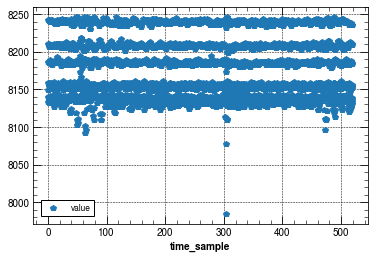

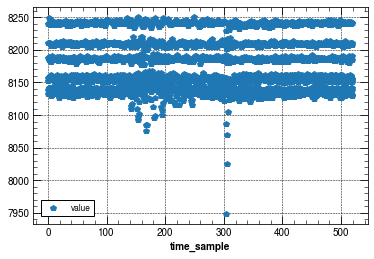

In [16]:
dfsignals.groupby(['folder_num', 'rpc', 'nevent']).plot(x='time_sample', y='value', subplots=True, marker='p', linestyle='')

## Example 2.2: using `olefin.RunAnalysis.get_signals()`

This example shows how to use the method bound to the `RunAnalysis` class to do the same thing as the preceding example.

In [17]:
run_path = '/eos/project/g/ghg-studies/BackupRPC/256/20210201/no-header-512/Cosmics0'
run_analysis = olefin.EPDTRunAnalysis.from_path(run_path, keep_data=True)
run_analysis.run()

  0%|          | 0/7 [00:00<?, ?it/s]

In [18]:
sample = run_analysis.signal_data.sample(2)
sample

feature                                       baseline                      \
strip                                                1         2         3   
folder_num rpc nevent voltage     voltage_app                                
5          5   519    9841.774253 9600         8156.09  8239.930  8133.035   
2          4   896    9226.663362 9000         8150.90  8178.275  8231.330   

feature                                                                      \
strip                                                 4         5         6   
folder_num rpc nevent voltage     voltage_app                                 
5          5   519    9841.774253 9600         8152.270  8137.430  8207.665   
2          4   896    9226.663362 9000         8181.195  8289.095  8175.505   

feature                                                    charge            \
strip                                                 7         1         2   
folder_num rpc nevent voltage     voltage_app                                 
5          5   519    9841.774253 9600         8184.210  2.144063  0.255851   
2          4   896    9226.663362 9000         8174.885  0.000000  0.000000   

feature                                                 ... type        \
strip                                                3  ...    5  6  7   
folder_num rpc nevent voltage     voltage_app           ...              
5          5   519    9841.774253 9600         0.92195  ...   -2 -2 -2   
2          4   896    9226.663362 9000         0.00000  ...   -2 -2 -2   

feature                                       wave_num                         
strip                                                1  2   3   4   5   6   7  
folder_num rpc nevent voltage     voltage_app                                  
5          5   519    9841.774253 9600               8  9  10  11  12  13  14  
2          4   896    9226.663362 9000               1  2   3   4   5   6   7  

[2 rows x 112 columns]

In [19]:
dfsignals = run_analysis.get_signals(sample)
dfsignals

time_sample  value  voltage_app
folder_num rpc nevent strip                                 
2          4   896    1                0   8150         9000
                      1                1   8154         9000
                      1                2   8148         9000
                      1                3   8148         9000
                      1                4   8150         9000
...                                  ...    ...          ...
5          5   519    7              515   8184         9600
                      7              516   8187         9600
                      7              517   8188         9600
                      7              518   8183         9600
                      7              519   8184         9600

[7280 rows x 3 columns]

folder_num  rpc  nevent
2           4    896       [AxesSubplot(0.125,0.125;0.775x0.755)]
5           5    519       [AxesSubplot(0.125,0.125;0.775x0.755)]
dtype: object

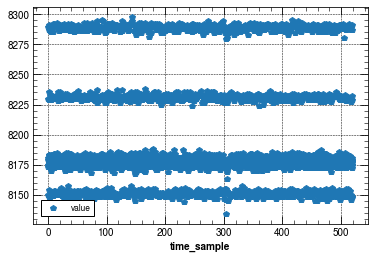

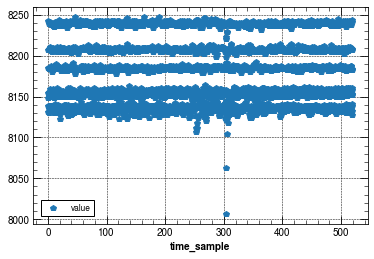

In [20]:
dfsignals.groupby(['folder_num', 'rpc', 'nevent']).plot(x='time_sample', y='value', subplots=True, marker='p', linestyle='')

## Example 2.3: the hard way

You can always manually extract signals by using a `SignalAnalysis.get_events()` method

In [23]:
config = run_analysis.config
strip_map = config.acquisition.strip_map
dfacq = run_analysis.acquisition_data

highest_voltage = dfacq.index.get_level_values('voltage').max()
rpc = 4
line = dfacq.xs([rpc, highest_voltage], level=['rpc', 'voltage'])
# let's get the folder number:
folder_number = int(line.squeeze().folder_num)
# Let's get signals from strip 5
for wave, rpc_dict in strip_map.items():
    if rpc_dict['rpc'] == 4 and rpc_dict['strip'] == 5:
        wavename = wave
wavefile = run_analysis.path / config.run.mix_folder / f'HV{folder_number}' / f'{wavename}.txt'
signal_analysis = olefin.EPDTSignalAnalysis.from_wavefile(config, wavefile)
signal_analysis.run()

baseline    height  inverse_height     charge  heights_ratio  time_peak  \
0    8289.935   1.70007        -0.98393   0.160365       1.727836        298   
1    8290.040  55.27088        -2.31312  10.561366      23.894515        306   
2    8289.420   1.27124        -1.04676   0.131847       1.214452        298   
3    8291.420   7.49324        -0.92476   1.138086       8.102902        295   
4    8289.135  22.70847        -0.95953   2.052563      23.666243        304   
..        ...       ...             ...        ...            ...        ...   
995  8290.610   0.92842        -1.02358   0.000000       0.907032        303   
996  8291.735   0.82167        -1.13033   0.000000       0.726929        126   
997  8290.815   1.80743        -1.12057   0.167510       1.612956        303   
998  8289.230   2.34606        -1.06994   0.278509       2.192702        302   
999  8291.950   0.96990        -0.86010   0.000000       1.127660        332   

     reflections_count  fired  isin_time_window  might_be_noise  is_signal  \
0                    0  False              True           False      False   
1                    1   True              True           False       True   
2                    0  False              True           False      False   
3                    0   True              True           False       True   
4                    0   True              True           False       True   
..                 ...    ...               ...             ...        ...   
995                  0  False              True           False      False   
996                  0  False             False           False      False   
997                  0  False              True           False      False   
998                  0   True              True           False       True   
999                  0  False              True           False      False   

     is_fat_signal  is_detected  type  
0            False        False    -2  
1            False         True     3  
2            False        False    -2  
3            False         True     1  
4            False         True     1  
..             ...          ...   ...  
995          False        False    -2  
996          False        False    -2  
997          False        False    -2  
998          False         True     1  
999          False        False    -2  

[1000 rows x 14 columns]

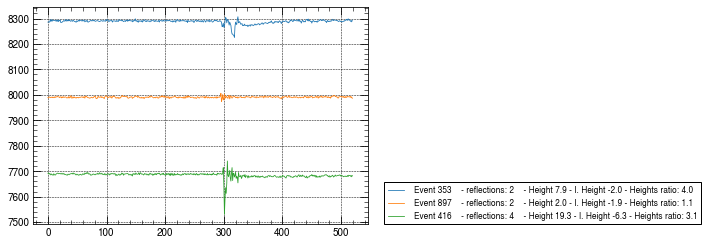

In [27]:
# Let's select the index of all the events
# Where fired == True and might_be_noise == True but
# with a heights ratio > 50
dfsignal = signal_analysis.data
# Use a boolean mask
mask = (dfsignal.fired) & (dfsignal.might_be_noise)
subset = dfsignal[mask].sample(3)
# Take 10 random samples and from those samples
# get the index (i.e. the event)
events = subset.index.values
# Use the get_events() function to retrieve
# the raw samples and plot them
all_rawdata = signal_analysis.get_events('all')
rawdata = all_rawdata[events, :]
# Plot data with each signal shifted a little
# so that they don't overlap
lines = plt.plot(rawdata.T - np.arange(len(events)) * 300)
# Set labels with the name of events and other info from the subset
# like the reflection counts and heights ratio
for (line, event, (ix, row)) in zip(lines, events, subset.iterrows()):
    line.set_label(f'Event {event:<6} - reflections: {row.reflections_count:<4} - Height {row.height:.1f} - I. Height {row.inverse_height:.1f} - Heights ratio: {row.heights_ratio:.1f}')
# Place legend outside the plot
plt.legend(loc=(1.05, 0))

Let's have a look at these events. By considering the first we can see that these looks like real signals but at the same time the reflections counts is higher than the set threshold and they get categorized as `might_be_noise`. To understand why we can take a single signal and plot it with its features

You can see that due to the algorithm and noise thresholds some real signals might be discarded. A better parameter estimation could be given by the heights ration: when this value tends to 1 it's highly likely that the signal is either a reflection or some false one